In [5]:
import colorsys
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

color_number = 10

def color_visualize(main_color, matched_colors):
    """
    :param main_color: user input color, should be rgb color, with value between [0, 255], like [126, 45, 200]
    :param matched_colors: matched colors calculated by the program
    :return: 
    """
    canvas = Image.new('RGB', (100 * color_number, 200), (255, 255, 255))
    draw = ImageDraw.Draw(canvas)
    for i, item in enumerate(matched_colors):
        draw.rectangle((i*100, 100, i* 100 + 100, 200), tuple(item))
    
    # add input color
    draw.rectangle((0, 0, 100 * color_number + 100, 100 ), tuple(main_color))

    return canvas

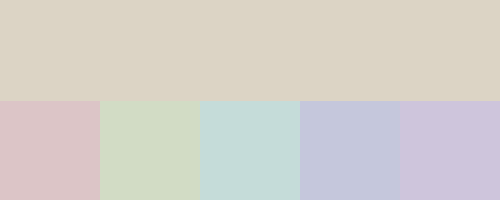

In [11]:
# X模型
color_visualize((220, 212, 197), [[220, 197, 199], [210, 220, 197], [197, 220, 217], [197, 199, 220], [206, 197, 220]])

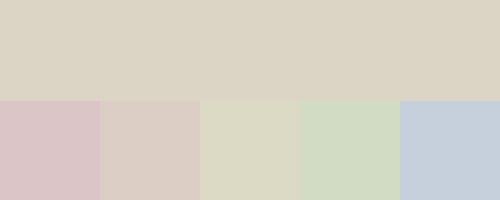

In [10]:
# Y模型
color_visualize((220, 212, 197), [[220, 197, 199], [220, 206, 197], [220, 217, 197], [210, 220, 197], [197, 208, 220]])

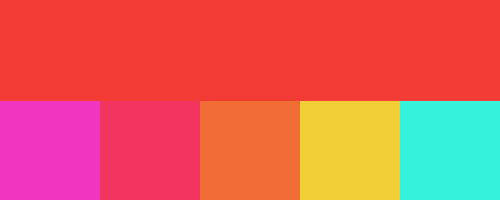

In [14]:
# L模型
# color_visualize((234, 235, 222), [[235, 234, 222], [223, 235, 222], [222, 235, 226], [222, 235, 232], [222, 231, 235]])

color_visualize((242, 60, 53), [[242, 53, 193], [242, 53, 95], [242, 109, 53], [242, 207, 53], [53, 242, 220]])

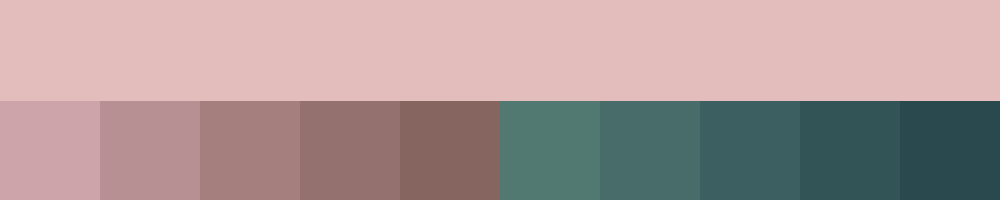

In [6]:
# I模型
color_visualize((227, 188, 188), [[204, 164, 170], [183, 144, 148], [165, 127, 126], [148, 113, 110], [134, 101, 96], [82, 120, 114], [71, 108, 105], [60, 96, 97], [51, 84, 87], [42, 73, 79]])

In [21]:


def calculate_matched_hue(main_hue, cover_degree, number):
    """
    :param main_hue:
    :param cover_degree:
    :param number:
    :return:
    """
    if number <= 0:
        return []

    result = []
    left_hue = main_hue - cover_degree / 360. / 2

    if left_hue < 0:
        left_hue += 1

    if number == 1:
        return [left_hue]

    # 当返回奇数个颜色，计算结果会包含原本的，所以多算一个
    num = number + number % 2

    for i in range(num):
        result.append(left_hue + cover_degree / (num - 1) / 360. * i)

    # 将多算的一个去掉
    if number % 2 == 1:
        del result[int(number/2)]

    # 如果hue值超过了[0, 1]的范围，则修正
    for i in range(len(result)):
        if result[i] < 0:
            result[i] += 1
        if result[i] > 1:
            result[i] -= 1

    return result


def color_match_harmony(input_color, mode='Y', number=4):
    """
    :param input_color:
    :param mode:
    :return:
    """
    if mode not in ['i', 'V', 'L', 'I', 'T', 'Y', 'X']:
        raise ValueError('Invalid harmony color match mode "%s".' % mode)

    color_rgb = input_color
    color_hsv = list(colorsys.rgb_to_hsv(color_rgb[0], color_rgb[1], color_rgb[2]))
    color_hsv[2] = color_hsv[2] / 255.

    result_hue = None

    if mode == 'i':
        result_hue = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=18, number=number)
    elif mode == 'V':
        result_hue = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=93.6, number=number)
    elif mode == 'L':
        first_part_percentage = 18 / (18 + 79.2)
        first_part_num = int(number * first_part_percentage)
        first_part_num = first_part_num if first_part_num > 0 else (first_part_num + 1)
        result_hue_1 = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=18, number=first_part_num)
        second_hue = color_hsv[0] + 0.25
        second_hue = second_hue if second_hue <= 1 else (second_hue - 1)
        result_hue_2 = calculate_matched_hue(main_hue=second_hue, cover_degree=79.2, number=number - first_part_num)
        result_hue = result_hue_1 + result_hue_2
    elif mode == 'I':
        first_part_num = int(number / 2)
        result_hue_1 = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=18, number=first_part_num)
        opposite_hue = color_hsv[0] + 0.5
        opposite_hue = opposite_hue if opposite_hue <= 1 else (opposite_hue - 1)
        result_hue_2 = calculate_matched_hue(main_hue=opposite_hue, cover_degree=18, number=number - first_part_num)
        result_hue = result_hue_1 + result_hue_2
    elif mode == 'T':
        result_hue = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=180, number=number)
    elif mode == 'Y':
        second_part_percentage = 18 / (18 + 79.2)
        second_part_num = int(number * second_part_percentage)
        second_part_num = second_part_num if second_part_num > 0 else (second_part_num + 1)
        result_hue_1 = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=93.6, number=number - second_part_num)
        opposite_hue = color_hsv[0] + 0.5
        opposite_hue = opposite_hue if opposite_hue <= 1 else (opposite_hue - 1)
        result_hue_2 = calculate_matched_hue(main_hue=opposite_hue, cover_degree=18, number=second_part_num)
        result_hue = result_hue_1 + result_hue_2
    elif mode == 'X':
        first_part_num = int(number / 2)
        result_hue_1 = calculate_matched_hue(main_hue=color_hsv[0], cover_degree=93.6, number=first_part_num)
        opposite_hue = color_hsv[0] + 0.5
        opposite_hue = opposite_hue if opposite_hue <= 1 else (opposite_hue - 1)
        result_hue_2 = calculate_matched_hue(main_hue=opposite_hue, cover_degree=93.6, number=number - first_part_num)
        result_hue = result_hue_1 + result_hue_2
    else:
        raise ValueError('Invalid color match mode "%s".' % mode)

    result = []
    for item in result_hue:
        color_hsv[1] = color_hsv[1] if color_hsv[1] > 0.8 else color_hsv[1] * 1.1
        color_hsv[2] = color_hsv[2] * 0.9 if color_hsv[2] > 0.8 else color_hsv[2]
        result.append([item, color_hsv[1], color_hsv[2]])

    for i, item in enumerate(result):
        rgb_color = list(colorsys.hsv_to_rgb(item[0], item[1], item[2]))
        for j in range(len(rgb_color)):
            rgb_color[j] = int(rgb_color[j] * 255)
        result[i] = rgb_color

    return result

In [54]:
color = (255, 234, 206)

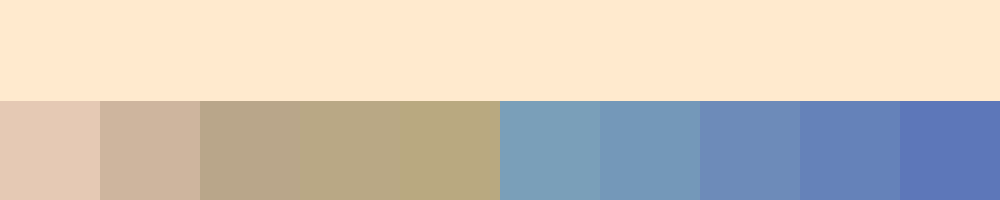

In [55]:
color_visualize(color, color_match_harmony(color, mode='I', number=10))

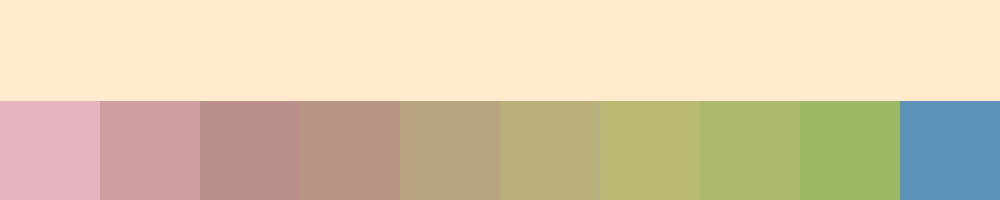

In [56]:
color_visualize(color, color_match_harmony(color, mode='Y', number=10))

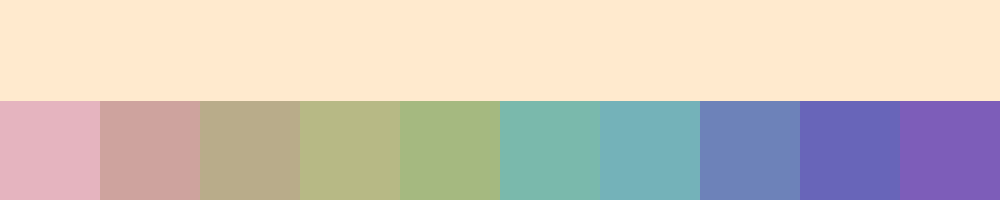

In [57]:
color_visualize(color, color_match_harmony(color, mode='X', number=10))

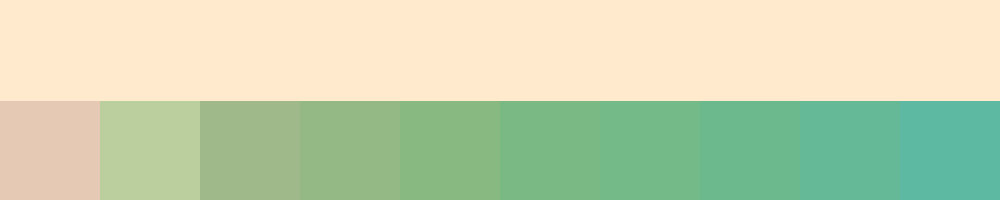

In [59]:
color_visualize(color, color_match_harmony(color, mode='L', number=10))

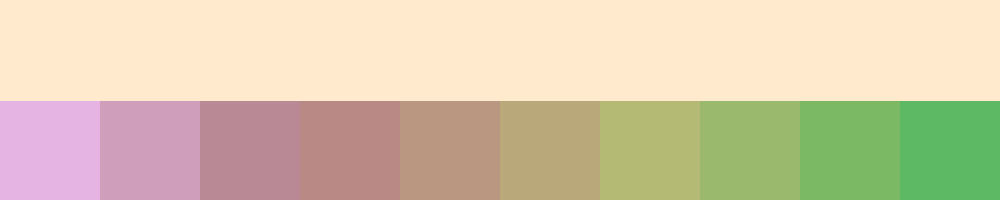

In [60]:
color_visualize(color, color_match_harmony(color, mode='T', number=10))

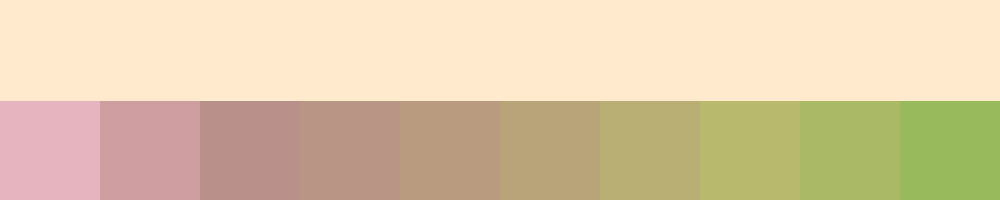

In [61]:
color_visualize(color, color_match_harmony(color, mode='V', number=10))